In [3]:
library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)

library(viridis)
library(ggvenn)

In [2]:
print(sessionInfo())

R version 4.3.1 (2023-06-16)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/Eva/opt/anaconda3/envs/R4b/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggvenn_0.1.10      viridis_0.6.4      viridisLite_0.4.2  RColorBrewer_1.1-3
 [5] patchwork_1.1.2    readxl_1.4.3       ggpubr_0.6.0       ggplot2_3.5.0     
 [9] tidyr_1.3.1        cowplot_1.1.1      stringr_1.5.1      rio_1.0.1         
[13] dplyr_1.1.4       

loaded via a namespace (and not attached):
 [1] utf8_1.2.4       generics_0.1.3   rstatix_0.7.2    stringi_1.8.3   
 [5] digest_0.6.35    magrittr_2.0.3   evaluate_0.23    pbdZMQ_0.3-11   
 [9] fastmap_1.1.1    cellran

# Import expression data with JTK analyses

In [4]:
#This data was generated using notebook ATL_AllelicGroupRhythmicity.ipynb
#:::::::::::::::::

ExprGenes <- import(file = '../ATL_AllelicGroupRhythmicity/Results/ExpressedGenes_JTK_AllelicGroups.csv', 
                   sep =',', header = TRUE, fill = TRUE )


In [4]:
ExprGenes[1:2,]

,Syntelog,Tissue,Condition,ATL_expressed_alleles,geneID,target_id,Average,SD,ATL_alleles,BH.Q,ADJ.P,Period,Adj_phase,Amplitude
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_1G000020,7.395377,0.1577245,4,1,1,20,19,0.10051609
2,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_2G000020,5.948141,0.1212230,4,1,1,20,4,0.09175902


# Calculate phase
**Note** the phase ('Lag') value provided by JTK can be 25 (ZT 25), genes with a phase of 25 need to be changed to 1 (= ZT 1).

In [5]:
### ADJUST PHASE AS THERE IS A PHASE = 25 THAT NEEDS TO CONVERTED TO 1
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
ExprGenes<-ExprGenes %>% 
            mutate(Adj_phase2 = case_when(Adj_phase == 25 ~ 1,
                                         Adj_phase != 25 ~ Adj_phase))

In [6]:
ExprGenes[1:2,]

,Syntelog,Tissue,Condition,ATL_expressed_alleles,geneID,target_id,Average,SD,ATL_alleles,BH.Q,ADJ.P,Period,Adj_phase,Amplitude,Adj_phase2
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_1G000020,7.395377,0.1577245,4,1,1,20,19,0.10051609,19
2,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_2G000020,5.948141,0.1212230,4,1,1,20,4,0.09175902,4


# Phase distribution plots

In [7]:
### CIRCULAR PLOT FUNCTION coord_curvedpolar(clip = "off") +
#::::::::::::::::::::::::::::::::
circPlot <- function (df, dusk, photoperiod) {
    phasePlot <-  ggplot() +
    geom_rect(aes(xmin= dusk,
                  xmax = 24,
                  ymin = -Inf,
                  ymax = Inf), 
                 fill = 'grey', alpha = 0.5, color = NA) +
   geom_histogram( aes(df$Adj_phase2), binwidth= 2, breaks = seq(0, 24), width = 2, colour = "black") + 
    
    coord_polar(start = 0) + theme_minimal() + 
    scale_fill_brewer() + 
    ylab("Count") + ggtitle("mRNA abundance per time of day") + 
    scale_x_continuous(limits = c(0, 24), breaks = seq(0, 24), labels = seq(0, 
        24))+
    labs(x = "ZT (h)", y = "Number of transcripts", title = photoperiod ) +
     
    theme (
            axis.title.x = element_text(size = 18),
            axis.title.y = element_text(size = 18),
            axis.text = element_text(size = 18, color = "black"),
               plot.title = element_text(size = 18))

                

                
   # scale_x_continuous(breaks = 0:24, expand = c(.002,0))
    }




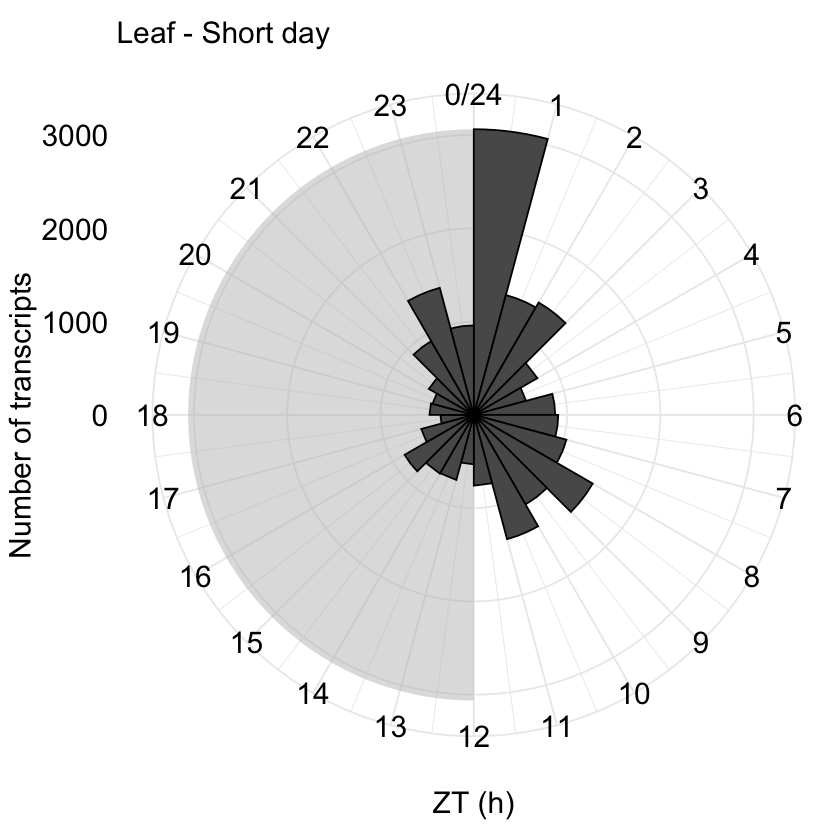

In [8]:
SD_leaf_Plot <- ExprGenes %>% 
            filter (Condition == 'SD', Tissue == 'Leaf', ADJ.P < 0.001) %>%
            select (target_id, Adj_phase2) %>% unique() %>%
            circPlot(12,'Leaf - Short day')
SD_leaf_Plot

In [9]:
SD_leaf_Plot %>% ggsave(file="./Results/Leaf_SDplot_circ.pdf", width=5, height=5, dpi=600)




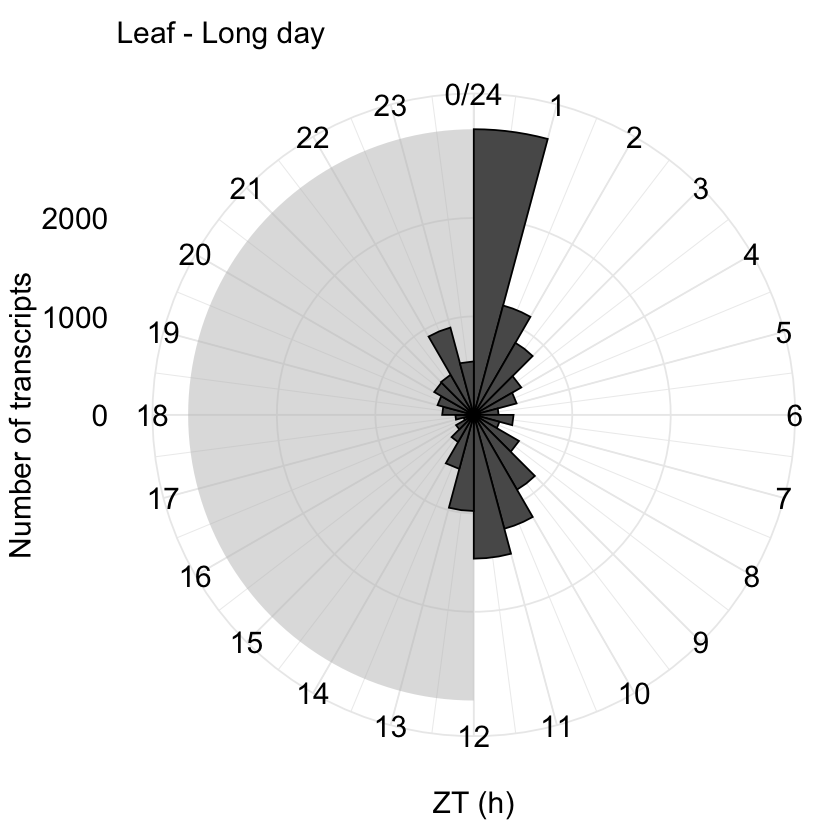

In [10]:
LD_leaf_Plot <- ExprGenes %>% 
            filter (Condition == 'LD', Tissue == 'Leaf', ADJ.P < 0.001) %>%
            select (target_id, Adj_phase2) %>% unique() %>%
            circPlot(12,'Leaf - Long day')
LD_leaf_Plot

In [11]:
LD_leaf_Plot %>% ggsave(file="./Results/Leaf_LDplot_circ.pdf", width=5, height=5, dpi=600)

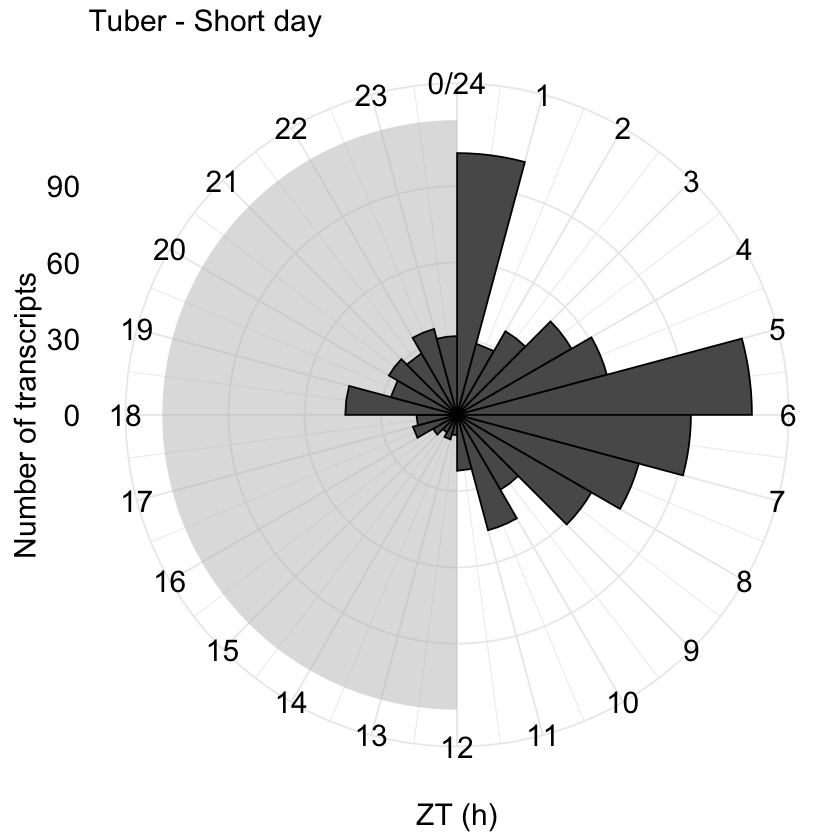

In [12]:
LD_tuber_Plot <- ExprGenes %>% 
            filter (Condition == 'SD', Tissue == 'Tuber', ADJ.P < 0.001) %>%
            select (target_id, Adj_phase2) %>% unique() %>%
            circPlot(12,'Tuber - Short day')
LD_tuber_Plot

In [13]:
LD_tuber_Plot %>% ggsave(file="./Results/Tuber_LDplot_circ.pdf", width=5, height=5, dpi=600)

# Is the phase of expression of rhythmic transcripts different between leaves and tubers?

### Under short days sow many transcripts are rhythmic in both leaves and tubers?

In [14]:
print('The number of transcripts that are rhythmic in leaves and tubers under short days is:')
ExprGenes %>% 
            filter (Condition == 'SD', ADJ.P < 0.001) %>%
            select (target_id, Adj_phase2, Tissue) %>% unique() %>%
        pivot_wider(names_from = Tissue, values_from = Adj_phase2) %>%
        filter(!is.na(Leaf), !is.na(Tuber)) %>% nrow()

[1] "The number of transcripts that are rhythmic in leaves and tubers under short days is:"


[1] 521

### Are there differences in phase between leaves and tubers?

Warning message in geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24)):
“All aesthetics have length 1, but the data has 521 rows.
ℹ Did you mean to use `annotate()`?”


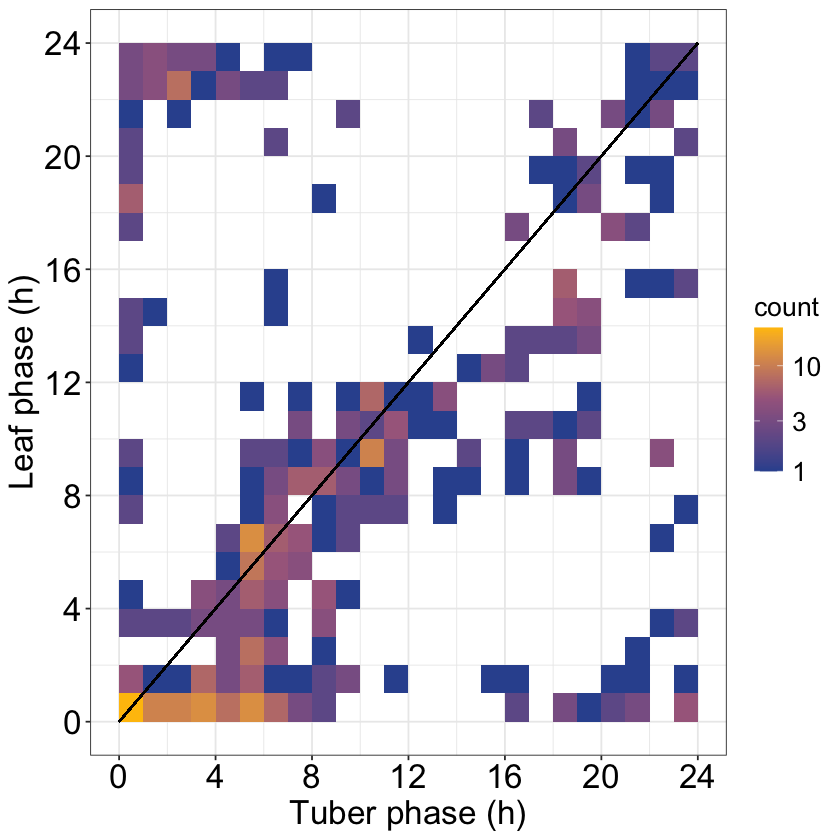

In [15]:
TuberLeafPhase_plot<- ExprGenes %>% 
            filter (Condition == 'SD', ADJ.P < 0.001) %>%
            select (target_id, Adj_phase2, Tissue) %>% unique() %>%
        pivot_wider(names_from = Tissue, values_from = Adj_phase2) %>%
        filter(!is.na(Leaf), !is.na(Tuber)) %>%


ggplot( aes(x=Tuber, y=Leaf)) +

geom_bin2d(bins =24) +  

scale_fill_gradientn(colours = c('#33539E', '#A5678E','#FFC107' ),  values = scales::rescale(c(1, 4, 7)),trans = "log10")+

scale_y_continuous(breaks=seq(0,24,4))+
scale_x_continuous(breaks=seq(0,24,4))+
geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24))+
 labs(y="Leaf phase (h)", x="Tuber phase (h)")+
  theme_bw()+
theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
    legend.title=element_text(size=16),
                legend.text=element_text(size=16))

TuberLeafPhase_plot

#Note: the aesthetifcs error message comes always when using geom_bin2d, see: https://ggplot2.tidyverse.org/reference/geom_bin_2d.html

In [16]:
TuberLeafPhase_plot %>% ggsave(file="./Results/TuberLeaf_HeatMap_Phase_plot.pdf", width=5, height=5, dpi=600)





Warning message in geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24)):
“All aesthetics have length 1, but the data has 521 rows.
ℹ Did you mean to use `annotate()`?”


### Since there seem to be overall a delay in the tuber, how many genes display phase differences between leaves and tubers?

In [17]:
# Function to calculate phase difference:
#:::::::::::::::::::::::::::::::::::::::::
# if negative, g2 has a later phase
PhaseChange <- function(G1, G2){   #g2 = LD
            g1 <- (360*(G1/24))
            g2<- (360*(G2/24))
            delta <- g1-g2
           
            if
                (abs(delta) <= 180) { 
                angle <- delta
                dphase <- 24* angle/360
                
            }else  {
                angle <- 360-abs(delta)
                dphase <- (delta/abs(delta)) * 24 * angle/360
                }
            
    }

In [18]:
# Calculate phase differences between leaves and tubers under short days
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

TubLeaf_SD_phase <- ExprGenes %>% 
                    filter (Condition == 'SD', ADJ.P < 0.001) %>%
                        select (target_id, Adj_phase2, Tissue) %>% unique() %>%
                    pivot_wider(names_from = Tissue, values_from = c(Adj_phase2)) %>%
                    filter(!is.na(Leaf), !is.na(Tuber)) %>% rowwise %>%
                    mutate(Delta_SD_phase = PhaseChange(Leaf, Tuber))
                    
                    

TubLeaf_SD_phase[1:2,]         
nrow(TubLeaf_SD_phase)

target_id,Leaf,Tuber,Delta_SD_phase
<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_1G010700,8,11,-3
Soltu.Atl_v3.04_1G010710,8,11,-3


[1] 521

In [19]:
## How many genes are phased delayed in the tuber?
#::::::::::::::::::::::::::::::::::::::::::::::::::
AvTubDelay<- TubLeaf_SD_phase%>% filter(Delta_SD_phase <= -2) %>% pull(Delta_SD_phase) %>% mean()

print(paste('Of the', nrow(TubLeaf_SD_phase),'transcripts rhythmic in both leaf and tuber under SD,', TubLeaf_SD_phase%>% filter(Delta_SD_phase <= -2) %>% nrow(), 
            'or', (TubLeaf_SD_phase%>% filter(Delta_SD_phase <= -2) %>% nrow())*100/nrow(TubLeaf_SD_phase), 
            ' % had a phase delay in the tuber of at least 2 h. These transcripts had an average delay of',AvTubDelay , 'h.'))

[1] "Of the 521 transcripts rhythmic in both leaf and tuber under SD, 245 or 47.0249520153551  % had a phase delay in the tuber of at least 2 h. These transcripts had an average delay of -4.42448979591837 h."


In [20]:
## How many genes are phased advanced in the tuber?
#::::::::::::::::::::::::::::::::::::::::::::::::::

AvTubAdvanced<- TubLeaf_SD_phase %>% filter(Delta_SD_phase >= 2) %>% pull(Delta_SD_phase) %>% mean()

print(paste('Of the', nrow(TubLeaf_SD_phase),'transcripts rhythmic in both leaf and tuber under SD,',TubLeaf_SD_phase %>% filter(Delta_SD_phase >= 2) %>% nrow(), 
            'or', (TubLeaf_SD_phase %>% filter(Delta_SD_phase >=2) %>% nrow())*100/nrow(TubLeaf_SD_phase), 
            ' % had a phase advanced in the tuber of at least 2h. These transcripts had an average advance of',AvTubAdvanced , 'h.'))

[1] "Of the 521 transcripts rhythmic in both leaf and tuber under SD, 98 or 18.809980806142  % had a phase advanced in the tuber of at least 2h. These transcripts had an average advance of 4.87755102040816 h."


### Export gene IDs for functional enrichment analysis

In [21]:
## Export tuber delay genes for functional enrichment analysis
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

export(ExprGenes %>% select(target_id, geneID) %>% unique() %>% 
                   filter(target_id %in% (TubLeaf_SD_phase %>% filter(Delta_SD_phase <= -2) %>% pull(target_id))) %>%
                  select(geneID),
                    file = './Results/TubDelay2.csv')


In [22]:

#Export tuber cycling genes
#::::::::::::::::::::::::::::::::::

export(ExprGenes %>% filter (Tissue =='Tuber', Condition == 'SD', ADJ.P < 0.001) %>% select(geneID) %>% unique(),
                           file = './Results/TubRhythmic.csv')

#Export tuber expressed genes
#::::::::::::::::::::::::::::::::::

export(ExprGenes %>% filter (Tissue =='Tuber', Condition == 'SD') %>% select(geneID) %>% unique(),
                          file = './Results/TubExpressed.csv')



## Tuber functional enrichment analysis using Mercaptor

I had done the determination of Mercaptor functional terms for the ATL genome (ATL_v3.hc_gene_models.repr.pep.fa) using https://www.plabipd.de. The file is /Users/Eva/Dropbox/Potato/RNA-seq_2/MapMan/ATL.results.txt
Functional enrichment analyses were conducted using https://www.plabipd.de/mercator_main.html


***Comparison1:** Tuber rhythmic genes with with more than 2 h delay with respect to leaf rhythmic in SD: 20250408_TubDelay2_vs_TubRhythmic.tsv

***Comparison2:** Tuber rhythmic genes with 2 h delays with respect to all tuber expressed genes in SD: 20250408_TubDelay2_vs_TubExpressed.tsv


# Are there differences in the expression level of rhythmic genes between photoperiods?

### Import differential gene expression analysis
Differential gene expression was determined by DEseq. Note that negative log2 fold-change values indicate higher expression under short days. 

In [5]:


SDLD_DE <- import(file = '../../../Data/DEseq/DifferentialExpression/atl_leaf_lgd_and_shd_differential_expression.csv',
                   sep =',', header = TRUE, fill = TRUE )


In [6]:
SDLD_DE[1:5,]

,V1,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Soltu.Atl_v3.04_1G015590.2,1705.266084,-0.148529384,0.15562234,-0.95442200,3.398701e-01,4.130041e-01
2,Soltu.Atl_v3.02_4G000280.1,1.348496,0.635599120,0.61987767,1.02536218,3.051923e-01,3.766024e-01
3,Soltu.Atl_v3.12_2G014340.1,16.230367,0.293158770,0.18456991,1.58833460,1.122107e-01,1.580239e-01
4,Soltu.Atl_v3.04_3G020000.1,159.723456,-0.001575624,0.05179255,-0.03042183,9.757306e-01,9.814283e-01
5,Soltu.Atl_v3.01_2G029550.5,36.938768,-1.418944805,0.19819911,-7.15918859,8.115598e-13,6.336144e-12


In [25]:
SDLD_DE <- SDLD_DE %>% rename(geneID = V1)
colnames(SDLD_DE)


[1] "geneID"         "baseMean"       "log2FoldChange" "lfcSE"         
[5] "stat"           "pvalue"         "padj"

### Get transcripts rhythmic in both SD and LD conditions

In [26]:
LeafRhythmic<- ExprGenes %>% filter (Tissue == 'Leaf', ADJ.P < 0.001) %>% select(target_id, geneID, Condition, ADJ.P) %>% unique() %>%
                        pivot_wider(names_from = Condition, values_from = ADJ.P) %>%
                        filter(!is.na(SD), !is.na(LD)) %>% unique()

In [27]:
nrow(LeafRhythmic)

[1] 8591

In [28]:
#Export list of leaf rhythmic genes
#:::::::::::::::::::::::::::::::::

export(LeafRhythmic %>% select(geneID),file = './Results/Leaf_SDandLD_rhythmic.csv')

In [29]:
#What is the average change in rhythmic gene expression between photoperiods
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLD_DE %>% filter (padj< 0.05) %>% filter (geneID %in% LeafRhythmic$geneID)%>% summarize(AvLog2FC = mean(log2FoldChange))

AvLog2FC
<dbl>
-0.2893279


In [30]:
print('This is percent of rhythmic transcripts with higher expression under long days than under short days:')
(SDLD_DE %>% filter (geneID %in% LeafRhythmic$geneID)%>%filter (padj< 0.05, log2FoldChange > 1) %>% nrow())*100/nrow(LeafRhythmic)
print('This is the percent of rhythmic transcripts with higher expression under short days than under long days:')
(SDLD_DE %>% filter (geneID %in% LeafRhythmic$geneID)%>%filter (padj< 0.05, log2FoldChange < -1) %>% nrow())*100/nrow(LeafRhythmic)
print('This is the percent of rhythmic transcripts with not changes in average expression between photoperiods:')
(SDLD_DE %>% filter (geneID %in% LeafRhythmic$geneID)%>%filter (padj> 0.05 | abs(log2FoldChange)<1) %>% nrow())*100/nrow(LeafRhythmic)

[1] "This is percent of rhythmic transcripts with higher expression under long days than under short days:"


[1] 5.30788

[1] "This is the percent of rhythmic transcripts with higher expression under short days than under long days:"


[1] 11.01152

[1] "This is the percent of rhythmic transcripts with not changes in average expression between photoperiods:"


[1] 83.57584

### Volcano plot of leaf differential expression between long days and short days of rhythmic genes

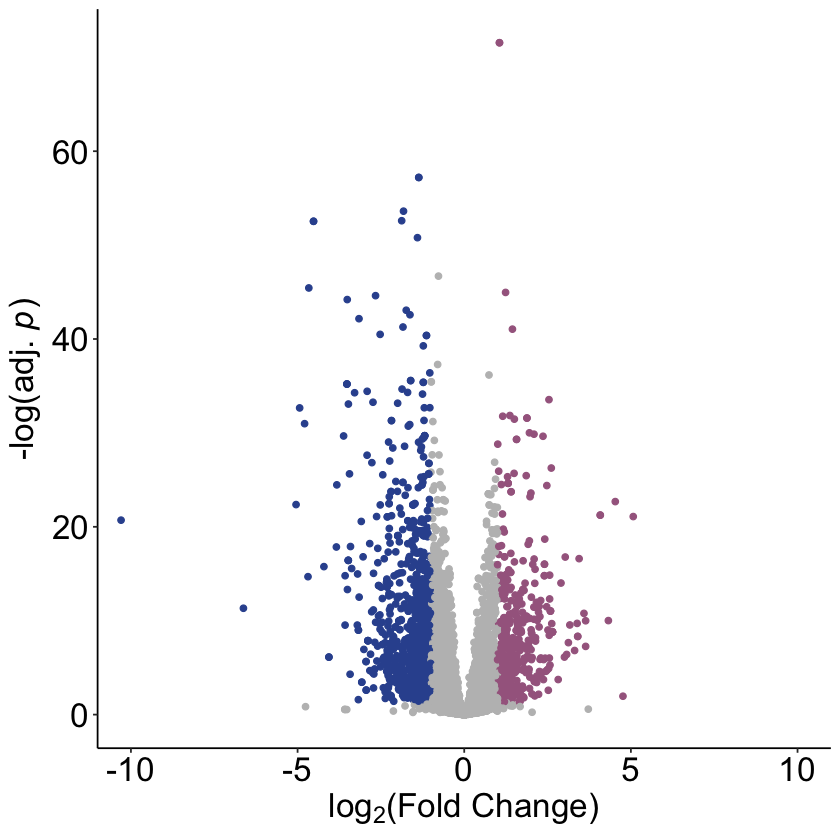

In [31]:
Volcano_SDLD<- SDLD_DE %>% filter (geneID %in% LeafRhythmic$geneID)%>% # select rhythmic genes
          filter(!is.na(padj)) %>% 
           mutate(DiffExpr = case_when(padj<0.05 & log2FoldChange > 1 ~ 'LD Up',
                                         padj<0.05 & log2FoldChange < -1 ~ 'SD Up',
                                        padj>0.05 ~ 'No Change',
                                      log2FoldChange >= -1 & log2FoldChange <= 1~ 'No Change')) %>%
    
            mutate(DiffExpr = as.factor(DiffExpr))%>%
            
                                  
    ggplot( aes(x = log2FoldChange, y = -log10(padj), col = DiffExpr)) +
         geom_point()+
     coord_cartesian(xlim=c(-10,10))+

      labs(y=expression(paste("-log(adj. ", italic("p"), ")")), x=expression( 'log'[2]*'(Fold Change)') )+

    scale_color_manual(values = c('SD Up' = '#33539E',  
                                    'LD Up'= '#A5678E',  
                                      'No Change' = 'grey'))+ 

theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
            legend.position="none",
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0))
       
Volcano_SDLD

In [32]:
## EXPORT PLOT
#::::::::::::::::::::::::::::::
Volcano_SDLD%>% ggsave(file="./Results/Volcano_SDLD_Leaf_Plot.pdf", 
                            width=5, height=5, dpi=600)




# Are there photoperiod dependent differences in the amplitude of expression of rhythmic genes?

In [33]:


PairedAmplitudePlot<- ExprGenes %>% filter (geneID %in% LeafRhythmic$geneID)%>% # select rhythmic genes
        select (Tissue, Condition, geneID, ADJ.P, Amplitude) %>%
            filter ( Tissue != 'Tuber') %>%
            unique() %>% 
            mutate(Condition = as.factor(Condition)) %>%
   select(geneID, Amplitude, Condition) %>% 
        
   
        pivot_wider(names_from = Condition, values_from = Amplitude) %>% 
        filter(!is.na(LD), !is.na(SD)) %>%

        ggpaired( cond1 = 'SD', cond2 = 'LD',
         color = 'condition', line.color = "gray", line.size = 0.1,
         palette = "jco")+
            
            
        labs(y="Amplitude", x="Condition", color = 'Condition')+

  # coord_cartesian(ylim=c(-0,5)) +
 scale_color_manual(values = c('SD' = '#33539E',  
                                    'LD'= '#A5678E')) +  
                                    
    scale_fill_manual(values = alpha(c('SD' = '#33539E', 
                                    'LD'= '#A5678E') ))+  
                                   


theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
            #legend.position="none",
                 legend.text=element_text(size=16),
                legend.title=element_text(size=16),
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0)) +
           
        

      
                stat_compare_means(method = 'wilcox.test', 
                           comparisons = list(c('SD','LD')),  p.adjust.method = "BH" ,
                           size = 4,
                           label = "p.signif"
                          )        
       

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


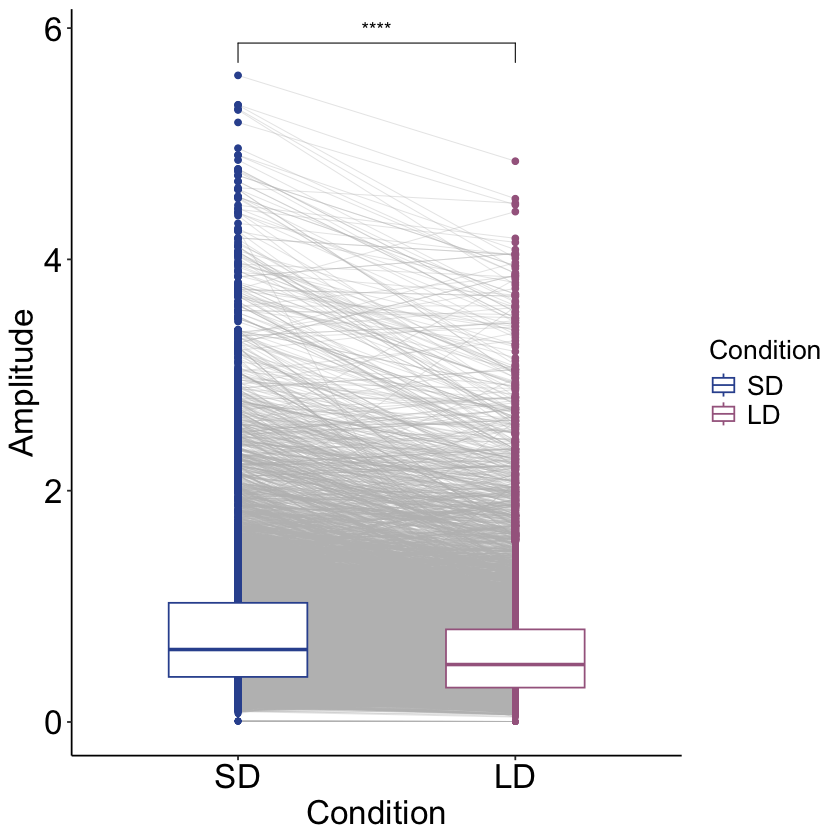

In [34]:
box<- PairedAmplitudePlot$layers[1]
lines<- PairedAmplitudePlot$layers[2]
points<- PairedAmplitudePlot$layers[3]

PairedAmplitudePlot$layers[1] <- lines
PairedAmplitudePlot$layers[2] <- points
PairedAmplitudePlot$layers[3] <- box
PairedAmplitudePlot

In [35]:
## EXPORT PLOT
#::::::::::::::::::::::::::::::
PairedAmplitudePlot%>% ggsave(file="./Results/PairedAmplitude_SDLD_Plot.pdf", 
                            width=2.75, height=5, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


### How many genes have differences in amplitude between photoperiods larger than 0.5

In [36]:

ExprGenes %>% filter (geneID %in% LeafRhythmic$geneID)%>% # select rhythmic genes
        select (Tissue, Condition, geneID, ADJ.P, Amplitude) %>%
            filter ( Tissue != 'Tuber') %>%
            unique() %>% 
            mutate(Condition = as.factor(Condition)) %>%
   select(geneID, Amplitude, Condition) %>% 
        
   
        pivot_wider(names_from = Condition, values_from = Amplitude) %>% 
        filter(!is.na(LD), !is.na(SD)) %>%
        
        summarize(LD_largeAmp = sum(LD-SD >0.5),
                SD_largeAmp = sum(LD-SD < -0.5),
                 All=n())
                 
                  

LD_largeAmp,SD_largeAmp,All
<int>,<int>,<int>
82,1035,8591


In [37]:
1035/8591
82/8591

[1] 0.1204749

[1] 0.009544873

## Do transcripts with larger amplitudes in SD have differences in expression level between photoperiods?

In [38]:
## These are the transcript with amplitude differences larger than 0.5
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

LargeAmpDiff_SDLD_05<- ExprGenes %>% filter (geneID %in% LeafRhythmic$geneID)%>% # select rhythmic genes
        select (Tissue, Condition, geneID, ADJ.P, Amplitude) %>%
            filter ( Tissue != 'Tuber') %>%
            unique() %>% 
            mutate(Condition = as.factor(Condition)) %>%
   select(geneID, Amplitude, Condition) %>% 
        
   
        pivot_wider(names_from = Condition, values_from = Amplitude) %>% 
        filter(!is.na(LD), !is.na(SD)) %>%
        mutate(AmpDiff = SD-LD) %>% 
        filter(AmpDiff>0.5)
nrow(LargeAmpDiff_SDLD_05)
LargeAmpDiff_SDLD_05[1:2,]


[1] 1035

geneID,LD,SD,AmpDiff
<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_3G008650.1,0.5319522,1.381946,0.8499935
Soltu.Atl_v3.04_2G006690.1,0.6987983,1.334571,0.6357723


In [39]:
## Add differential expression information
#::::::::::::::::::::::::::::::::::::::::::::
LargeAmpDiff_SDLD_05 <- LargeAmpDiff_SDLD_05 %>% left_join(SDLD_DE %>% select(geneID, log2FoldChange, padj), by = 'geneID')

In [40]:
nrow(LargeAmpDiff_SDLD_05)
LargeAmpDiff_SDLD_05[1:2,]

[1] 1035

geneID,LD,SD,AmpDiff,log2FoldChange,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_3G008650.1,0.5319522,1.381946,0.8499935,-0.05915569,0.85546717
Soltu.Atl_v3.04_2G006690.1,0.6987983,1.334571,0.6357723,0.52857455,0.06514031


In [41]:
## What is the number and percent of transcripts with increases in amplitude under short days but no changes in average expression between photoperiods
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
LargeAmpDiff_SDLD_05 %>% filter(padj>= 0.05 |abs(log2FoldChange)>1 ) %>% nrow()

(LargeAmpDiff_SDLD_05 %>% filter(padj>= 0.05 | abs(log2FoldChange)>1) %>% nrow())*100/nrow(LargeAmpDiff_SDLD_05)



[1] 894

[1] 86.37681

In [42]:
## What is the number and percent of transcripts with increases in amplitude and average expression under short days
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
LargeAmpDiff_SDLD_05 %>% filter(padj< 0.05, log2FoldChange < -1) %>% nrow()

(LargeAmpDiff_SDLD_05 %>% filter(padj< 0.05, log2FoldChange < -1) %>% nrow())*100/nrow(LargeAmpDiff_SDLD_05)


[1] 238

[1] 22.99517

In [43]:
## What is the number and percent of transcripts with increases in amplitude but decreases in average expression under short days
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
LargeAmpDiff_SDLD_05 %>% filter(padj< 0.05, log2FoldChange >1) %>% nrow()

(LargeAmpDiff_SDLD_05 %>% filter(padj< 0.05, log2FoldChange >1) %>% nrow())*100/nrow(LargeAmpDiff_SDLD_05)



[1] 106

[1] 10.24155

In [44]:
# Export list of genes with increase in amplitude under short days 
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
export(LargeAmpDiff_SDLD_05 %>% select(geneID),
                    file = './Results/LargeAmpDiff_SDLD_05.csv')


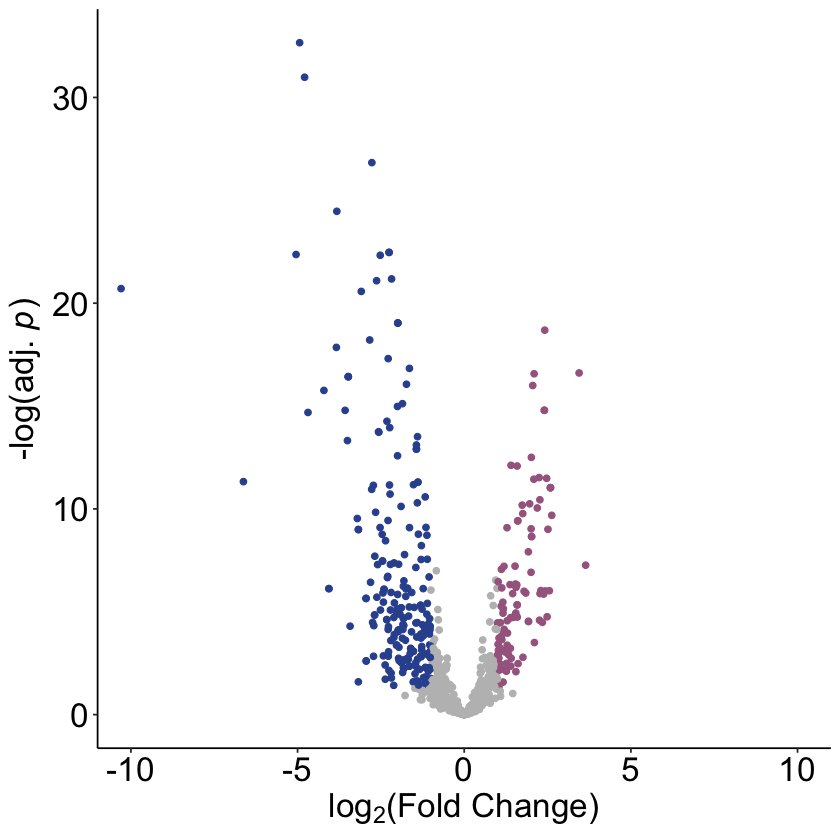

In [45]:
Volcano_SDLD_LargeAmpDiff<- SDLD_DE %>% filter (geneID %in% LargeAmpDiff_SDLD_05$geneID)%>% # select rhythmic genes
          filter(!is.na(padj)) %>% 
           mutate(DiffExpr = case_when(padj<0.05 & log2FoldChange > 1 ~ 'LD Up',
                                         padj<0.05 & log2FoldChange < -1 ~ 'SD Up',
                                        padj>0.05 ~ 'No Change',
                                      log2FoldChange >= -1 & log2FoldChange <= 1~ 'No Change')) %>%
    
            mutate(DiffExpr = as.factor(DiffExpr))%>%
            
                                  
    ggplot( aes(x = log2FoldChange, y = -log10(padj), col = DiffExpr)) +
         geom_point()+
     coord_cartesian(xlim=c(-10,10))+

      labs(y=expression(paste("-log(adj. ", italic("p"), ")")), x=expression( 'log'[2]*'(Fold Change)') )+

    scale_color_manual(values = c('SD Up' = '#33539E',  
                                    'LD Up'= '#A5678E',  
                                      'No Change' = 'grey'))+ 

theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
            legend.position="none",
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0))
       
Volcano_SDLD_LargeAmpDiff

In [46]:
## EXPORT PLOT
#::::::::::::::::::::::::::::::
Volcano_SDLD_LargeAmpDiff%>% ggsave(file="./Results/Volcano_SDLD_LargeAmpDiff.pdf", 
                            width=5, height=5, dpi=600)



### Functional enrichment analysis using Mercator
Transcripts with large (> 0.5) increases in amplitude under short days in comparison to all transcripts rhythmic in both conditions:
LargeAmpDiff_SDLD_05 vs. Leaf_SDandLD_rhythmic.csv
Results/20250409_LargeAmpDiff_SDLD_05_vs_Leaf_SDandLD_rhythmic.tsv



### Test the phase of expression of genes with large changes in amplitude

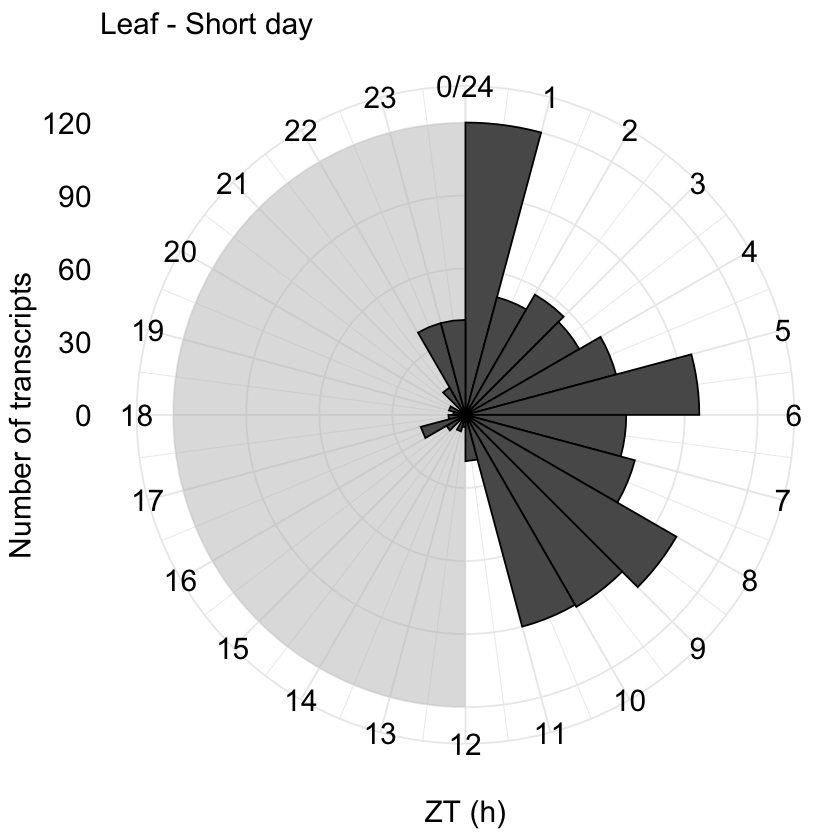

In [47]:
## Phase distribution under short days
#:::::::::::::::::::::::::::::::::::::
LargeAmpDiff_Phase_SD_Plot <- ExprGenes %>% filter(Tissue== 'Leaf', Condition == 'SD') %>%
            filter (geneID %in% (LargeAmpDiff_SDLD_05 %>% pull(geneID)))%>%
            select (geneID, Adj_phase2) %>% unique() %>%
            circPlot(12,'Leaf - Short day')
LargeAmpDiff_Phase_SD_Plot

In [48]:
#Export plot
#:::::::::::

LargeAmpDiff_Phase_SD_Plot %>% ggsave(file="./Results/LargeAmpDiff_Phase_SD_Plot.pdf", width=5, height=5, dpi=600)





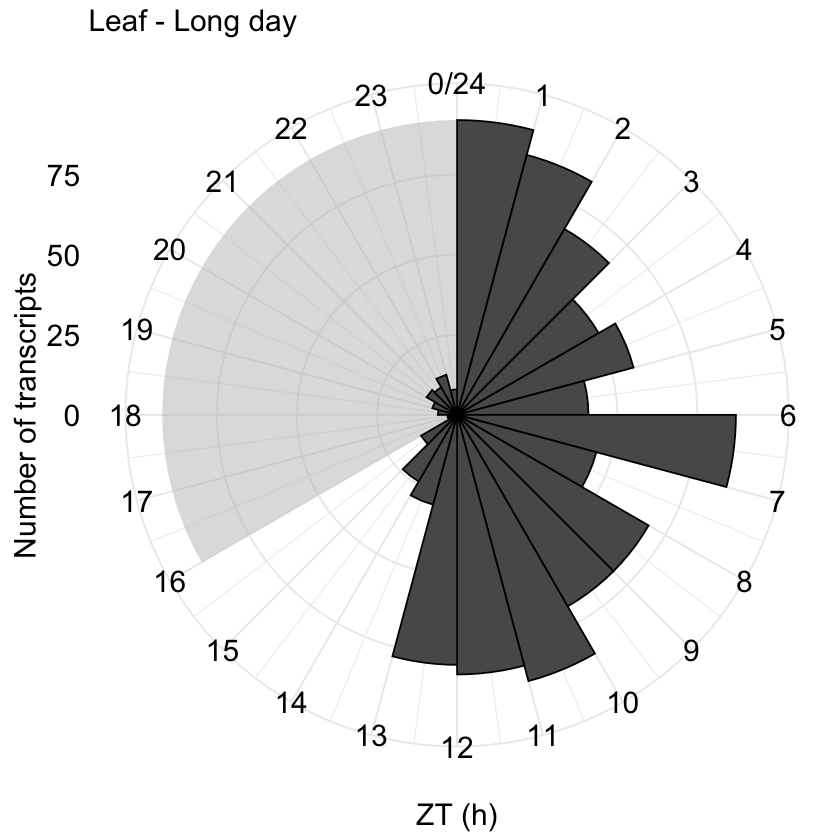

In [49]:
## Phase distribution under long days
#:::::::::::::::::::::::::::::::::::::
LargeAmpDiff_Phase_LD_Plot <- ExprGenes %>% filter(Tissue== 'Leaf', Condition == 'LD') %>%
            filter (geneID %in% (LargeAmpDiff_SDLD_05 %>% pull(geneID)))%>%
            select (geneID, Adj_phase2) %>% unique() %>%
            circPlot(16,'Leaf - Long day')
LargeAmpDiff_Phase_LD_Plot

In [50]:
#Export plot
#:::::::::::

LargeAmpDiff_Phase_LD_Plot %>% ggsave(file="./Results/LargeAmpDiff_Phase_LD_Plot.pdf", width=5, height=5, dpi=600)

### What are the transcription factors with increases in amplitude under SD?

In [60]:
LargeAmpDiff_SDLD_05[1:2,]

geneID,LD,SD,AmpDiff,log2FoldChange,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_3G008650.1,0.5319522,1.381946,0.8499935,-0.05915569,0.85546717
Soltu.Atl_v3.04_2G006690.1,0.6987983,1.334571,0.6357723,0.52857455,0.06514031


In [53]:
# Import ATL Mercator annotation
#:::::::::::::::::::::::::::::::::::
Mercator <- import(file = 
paste('../Data/ATL_Mercator_Annot.csv'), 
                   sep =',', header = TRUE, fill = TRUE )

In [54]:
Mercator[1:2,]

,geneID,Annotation,BINCODE,NAME,DESCRIPTION,TYPE,target_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_0G000010.1,hypothetical protein,35.2,No Mercator4 annotation.no other annotation available,mercator4v6.0: not classified & original description: none,T,Soltu.Atl_v3.01_0G000010
2,Soltu.Atl_v3.01_0G000020.1,60S acidic ribosomal protein family,17.1.2.1.46,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU).LSU proteome.component *(RPP1),mercator4v6.0: component *(RPP1) of large ribosomal-subunit (LSU) proteome & original description: none,T,Soltu.Atl_v3.01_0G000020


#### Search for potential regulators
Selected genes in BINCODEs:\
15.5: RNA biosynthesis.DNA-binding transcriptional regulation\
27.1: Multi-process regulation.circadian clock system\
26.1: External stimuli response.light\


In [55]:
 
 LargeAmpDiff_SDLD_05 %>% 
            filter(geneID %in% (Mercator %>% filter(str_detect(BINCODE, '15.5')) %>% pull(geneID))) %>% filter(AmpDiff > 1) %>% 
            unique() %>% nrow()


LargeAmpDiff_SDLD_05 %>% 
            filter(geneID %in% (Mercator %>% filter(str_detect(BINCODE, '15.5')) %>% pull(geneID))) %>% filter(AmpDiff > 1) %>% #nrow()

left_join(Mercator %>% select(geneID, Annotation, NAME), by = 'geneID') 


[1] 13

geneID,LD,SD,AmpDiff,log2FoldChange,padj,Annotation,NAME
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Soltu.Atl_v3.06_1G009840.1,1.1533603,3.243600,2.090240,-1.6484794,0.0044170562,basic helix-loop-helix (bHLH) DNA-binding superfamily protein,RNA biosynthesis.DNA-binding transcriptional regulation.basic DNA-binding domain.basic helix-loop-helix (bHLH) domain.bHLH class-VIIIb transcription factor
Soltu.Atl_v3.06_4G014240.1,1.1533603,3.243600,2.090240,-1.6484794,0.0044170562,basic helix-loop-helix (bHLH) DNA-binding superfamily protein,RNA biosynthesis.DNA-binding transcriptional regulation.basic DNA-binding domain.basic helix-loop-helix (bHLH) domain.bHLH class-VIIIb transcription factor
Soltu.Atl_v3.09_0G011860.2,1.0972224,2.159120,1.061897,-0.9511461,0.0210083995,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor
Soltu.Atl_v3.10_0G000150.1,2.7717556,4.150069,1.378314,-2.1936438,0.0096011554,circadian clock associated,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.tryptophan-cluster structure.REVEILLE-type transcription factor
Soltu.Atl_v3.10_1G000100.1,2.2090861,3.636281,1.427195,-2.1854705,0.0165103478,circadian clock associated,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.tryptophan-cluster structure.REVEILLE-type transcription factor
Soltu.Atl_v3.02_3G009730.2,1.2616107,2.386993,1.125383,-2.0985937,0.0001289896,cycling DOF factor,RNA biosynthesis.DNA-binding transcriptional regulation.zinc-coordinating DNA-binding domain.DOF transcription factor
Soltu.Atl_v3.02_3G009730.2,1.2616107,2.386993,1.125383,-2.0985937,0.0001289896,cycling DOF factor,Plant organogenesis.flower formation.photoperiodic pathway.transcriptional regulator *(CDF)
Soltu.Atl_v3.09_0G011770.2,1.0972224,2.159120,1.061897,-0.9511461,0.0210083995,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor
Soltu.Atl_v3.09_0G011780.1,0.9449799,2.131904,1.186925,-0.7237754,0.0619757228,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor


In [56]:
#Export potential regulators of increases in amplitude under short days
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

export(LargeAmpDiff_SDLD_05 %>% 
            filter(geneID %in% (Mercator %>% filter(str_detect(BINCODE, '15.5')) %>% pull(geneID))) %>% filter(AmpDiff > 1) %>% #nrow()
            left_join(Mercator %>% select(geneID, Annotation, NAME), by = 'geneID') ,
                          file = './Results/LargeAmpDiff_Regulators.csv')

# Are there photoperiod dependent differences in phase of expression?

In [61]:
# Calculate phase differences between short and long days in leaves
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

LD_SD_phase <- ExprGenes %>% 
                    filter (Tissue == 'Leaf', ADJ.P < 0.001) %>%
                        select (geneID, Adj_phase2, Condition) %>% unique() %>%
                    pivot_wider(names_from = Condition, values_from = c(Adj_phase2)) %>%
                    filter(!is.na(LD), !is.na(SD)) %>% rowwise %>%
                    mutate(Delta_LDSD_phase = PhaseChange(LD, SD))
                    
                    

LD_SD_phase [1:2,]         
nrow(LD_SD_phase)

geneID,SD,LD,Delta_LDSD_phase
<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_0G000350.4,17,19,2
Soltu.Atl_v3.04_2G005650.2,9,17,8


[1] 8591

### Plot phase distributions in SD and LD

Warning message in geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24)):
“All aesthetics have length 1, but the data has 8591 rows.
ℹ Did you mean to use `annotate()`?”


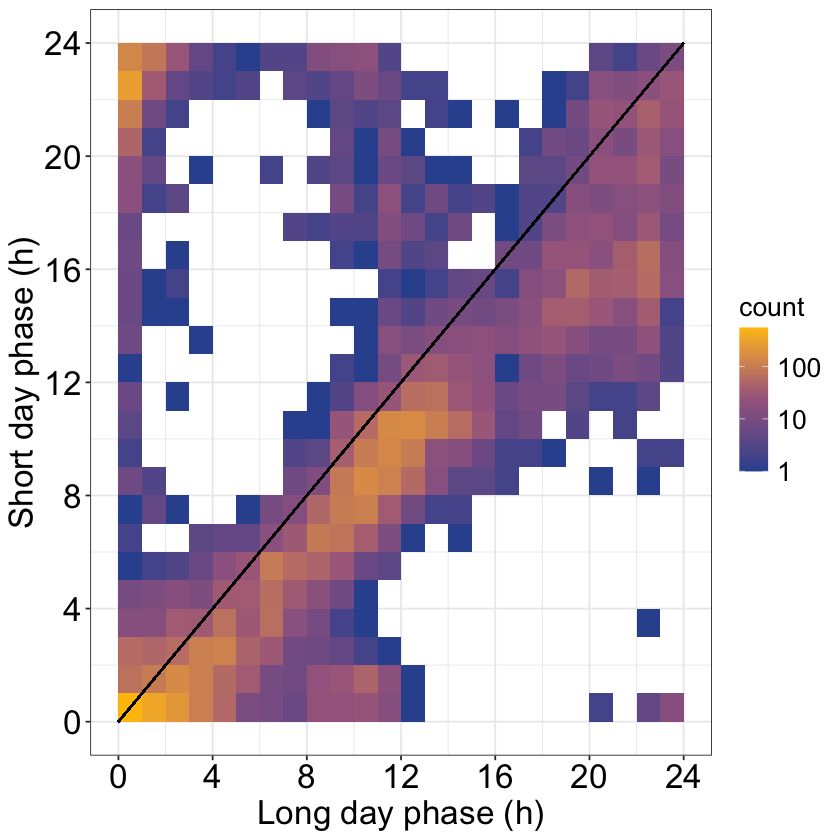

In [62]:
SDLDPhase_plot <- LD_SD_phase %>%


ggplot( aes(x=LD, y=SD)) +

geom_bin2d(bins =24) +  

scale_fill_gradientn(colours = c('#33539E', '#A5678E','#FFC107' ),  values = scales::rescale(c(1, 4, 7)),trans = "log10")+

scale_y_continuous(breaks=seq(0,24,4))+
scale_x_continuous(breaks=seq(0,24,4))+
geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24))+
 labs(y="Short day phase (h)", x="Long day phase (h)")+
  theme_bw()+
theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
    legend.title=element_text(size=16),
                legend.text=element_text(size=16))

SDLDPhase_plot


In [63]:
#EXPORT PLOT
#:::::::::::
SDLDPhase_plot %>% ggsave(file="./Results/SDLD_Leaf_HeatMap_phase.pdf", 
                          width=5, height=5, dpi=600)


Warning message in geom_segment(aes(x = 0, y = 0, xend = 24, yend = 24)):
“All aesthetics have length 1, but the data has 8591 rows.
ℹ Did you mean to use `annotate()`?”


In [64]:
LD_SD_phase[1:2,]

geneID,SD,LD,Delta_LDSD_phase
<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.04_0G000350.4,17,19,2
Soltu.Atl_v3.04_2G005650.2,9,17,8


## Which are the transcripts delayed in LD in leaves?

In [65]:
# What is the average phase difference in long day delayed transcripts?
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
AvLD_delay <- LD_SD_phase %>% filter(Delta_LDSD_phase >= 2) %>% pull(Delta_LDSD_phase) %>% mean()


print(paste('Of the', nrow(LD_SD_phase),'transcripts rhythmic in both photoperiods,', LD_SD_phase%>% filter(Delta_LDSD_phase >= 2) %>% nrow(), 
            'or', (LD_SD_phase%>% filter(Delta_LDSD_phase >= 2) %>% nrow())*100/nrow(LD_SD_phase), 
            ' % had a phase delay in long days of at least 2 h. These transcripts had an average delay of',AvLD_delay , 'h.'))

[1] "Of the 8591 transcripts rhythmic in both photoperiods, 4424 or 51.4957513677104  % had a phase delay in long days of at least 2 h. These transcripts had an average delay of 3.66930379746835 h."


In [66]:
#Export leaf rhythmic transcripts with phase delays in LD
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

export(LD_SD_phase %>% filter(Delta_LDSD_phase >= 2)  %>% select(geneID) %>% unique(),
                          file = './Results/LD_delay_2.csv')

### Mercator4 analyses LD delayed genes: https://www.plabipd.de/mercator_main.html
No significant enrichment was found in transcripts delayed by at least 2 h in LD (LD_delay_2.csv) when compared to all transcripts rhythmic in both LD and SD in leaves (Leaf_SDandLD_rhythmic.csv)

## How many genes have a phase advanced in LD?

In [67]:
# What is the average phase difference in long day advanced transcripts?
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
AvLD_advance <- LD_SD_phase %>% filter(Delta_LDSD_phase <= -2) %>% pull(Delta_LDSD_phase) %>% mean()


print(paste('Of the', nrow(LD_SD_phase),'transcripts rhythmic in both photoperiods,', LD_SD_phase%>% filter(Delta_LDSD_phase <= -2) %>% nrow(), 
            'or', (LD_SD_phase%>% filter(Delta_LDSD_phase <= -2) %>% nrow())*100/nrow(LD_SD_phase), 
            ' % had a phase advance in long days of at least 2 h. These transcripts had an average advance of',AvLD_advance , 'h.'))

[1] "Of the 8591 transcripts rhythmic in both photoperiods, 1036 or 12.0591316494005  % had a phase advance in long days of at least 2 h. These transcripts had an average advance of -4.49324324324324 h."


## Which are the genes with photoperiod delays in long days of at least 6h?

In [68]:
LD_SD_phase %>% filter(Delta_LDSD_phase >= 6) %>% nrow()

[1] 716

In [69]:
#Export leaf rhythmic transcripts with long day phase delays of at least 6 h
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

export(LD_SD_phase %>% filter(Delta_LDSD_phase >= 6) %>% select(geneID) %>% unique(),
                          file = './Results/Leaf_LD_delay_6h.csv')

## Functional enrichment analysis of transcripts with at least 6 h phase delays under long das

Used Mercator4 (https://www.plabipd.de/mercator_main.html) and MapMan annotation to compare genes with 6 h phase delays in LD (Leaf_LD_delay_6h.csv) with all genes rhythmic in both SD and LD (Leaf_SDandLD_rhythmic.csv). The enrichment results are in:
./Mercator_Results/20250415_Leaf_LD_delay_6h_VS_Leaf_SDandLD_rhythmic.tsv